In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
from collections import Counter
plt.style.use('ggplot')
rcParams['figure.figsize'] = 15, 6


In [8]:
normal_df = pd.read_csv("dataset/Sensor_data_Normal.csv", parse_dates=True, index_col='Timestamp')
attack_df = pd.read_csv("dataset/Sensor_data_NA.csv", parse_dates=True, index_col='Timestamp')

In [10]:
first_occurence = attack_df['Normal/Attack'].ne('Normal').idxmax()

In [11]:
normal_vals_from_attack = attack_df[attack_df.index < first_occurence]

In [12]:
normal_vals_from_attack

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-28 10:00:00,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
2015-12-28 10:00:01,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2015-12-28 10:00:02,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
2015-12-28 10:00:03,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
2015-12-28 10:00:04,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,2,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal
2015-12-28 10:00:05,2.609294,523.8673,2,2,1,262.0161,8.394514,328.6337,2.444110,2,...,2,1,250.7530,1.649953,189.5027,0.000128,1,1,1,Normal
2015-12-28 10:00:06,2.637158,524.1028,2,2,1,262.0161,8.394514,328.6337,2.444110,2,...,2,1,250.5928,1.649953,189.5027,0.000128,1,1,1,Normal
2015-12-28 10:00:07,2.652211,524.2206,2,2,1,262.0161,8.394514,328.6337,2.441803,2,...,2,1,250.5928,1.649953,189.5027,0.000128,1,1,1,Normal
2015-12-28 10:00:08,2.655735,524.4954,2,2,1,262.0161,8.394514,328.6337,2.441803,2,...,2,1,250.9132,1.649953,189.5027,0.000128,1,1,1,Normal


In [13]:
training_data = normal_df.append(normal_vals_from_attack)

In [14]:
test_data = attack_df[attack_df.index >= first_occurence]

In [15]:
test_data[test_data['Normal/Attack'] == 'A ttack']

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
Timestamp,,,,,,,,,,,,,,,,,,,,,


In [16]:
Counter(test_data['Normal/Attack'])

Counter({'Attack': 53900, 'Normal': 394265})

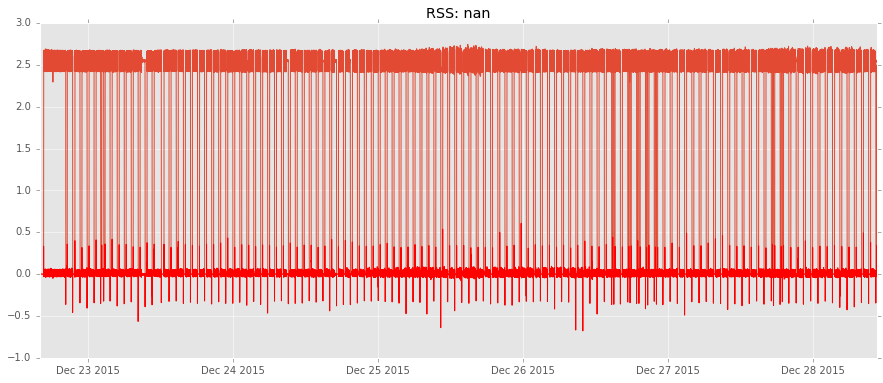

In [18]:
model = ARIMA(training_data['FIT101'], order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(training_data['FIT101'])
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-training_data['FIT101'])**2))